In [ ]:
# 🗑️ Waste Classification for Recycling
# Problem Statement:
# Develop an AI-based image classification model that can identify whether waste items are recyclable or non-recyclable.
# This helps in automating waste segregation, supporting sustainable waste management and recycling efforts.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
!unzip /content/trashnet.zip -d /content/trashnet


Archive:  /content/trashnet.zip
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard1.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard10.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard100.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard101.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard102.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard103.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard104.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard105.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard106.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard107.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard108.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/cardboard109.jpg  
  inflating: /content/trashnet/dataset-resized/cardboard/ca

In [5]:
import os
os.listdir('/content/trashnet')


['dataset-resized']

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/trashnet/dataset-resized',   # ✅ Correct path
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/trashnet/dataset-resized',   # ✅ Same here
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')   # 6 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_data, validation_data=val_data, epochs=5)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 805ms/step - accuracy: 0.2082 - loss: 2.4599 - val_accuracy: 0.3797 - val_loss: 1.5779
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 803ms/step - accuracy: 0.4141 - loss: 1.4762 - val_accuracy: 0.4314 - val_loss: 1.4494
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 807ms/step - accuracy: 0.4394 - loss: 1.3374 - val_accuracy: 0.4592 - val_loss: 1.3916
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 806ms/step - accuracy: 0.5125 - loss: 1.2008 - val_accuracy: 0.4652 - val_loss: 1.4617
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 796ms/step - accuracy: 0.5883 - loss: 1.0501 - val_accuracy: 0.4791 - val_loss: 1.3644


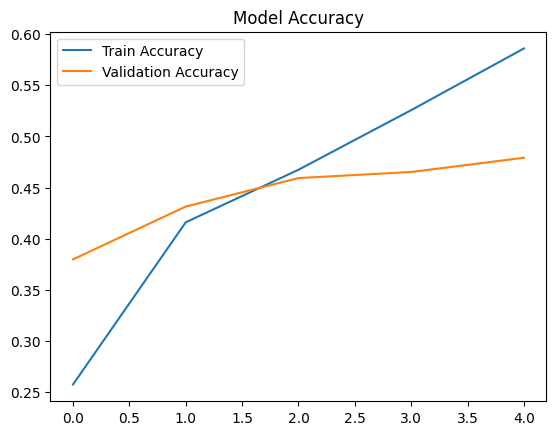

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [11]:
model.save('waste_classifier.h5')
print("✅ Model saved successfully as waste_classifier.h5")


✅ Model saved successfully as waste_classifier.h5


In [13]:
from google.colab import files
files.download('waste_classifier.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!zip waste_classifier.zip waste_classifier.h5


  adding: waste_classifier.h5 (deflated 20%)


In [15]:
!zip waste_classifier.zip waste_classifier.h5


updating: waste_classifier.h5 (deflated 20%)
